<a href="https://colab.research.google.com/github/dauparas/tensorflow2_ipynb/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import dependencies { display-mode: "form" }

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

import tensorflow as tf
from tensorflow.python import tf2
if not tf2.enabled():
  import tensorflow.compat.v2 as tf
  tf.enable_v2_behavior()
  assert tf2.enabled()

import tensorflow_datasets as tfds
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions
from keras.layers import Input, Embedding, LSTM, Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns; sns.set()
import keras.backend as K
import random

%matplotlib inline
plt.style.use('dark_background')

TensorFlow 2.x selected.


Using TensorFlow backend.


# Create data

In [0]:
sigma=0.1 #noise level
X = np.random.uniform(low=0.0, high=1.0, size=1000)[:,np.newaxis]
Y = np.sin(np.pi/2*X)+sigma*np.random.normal(loc=0.0, scale=1.0, size=X.shape)

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [3]:
print(X.shape, Y.shape)

(1000, 1) (1000, 1)


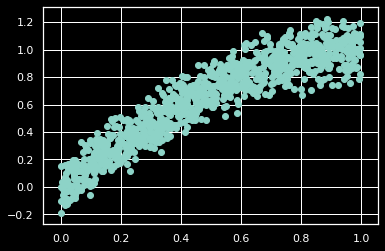

In [4]:
plt.scatter(X,Y);

# Create tf.dataset

In [0]:
batch_size = 32
train_dataset = (X, Y) #need float32 for TF2
train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.batch(batch_size)

In [6]:
print(train_dataset)

<BatchDataset shapes: ((None, 1), (None, 1)), types: (tf.float32, tf.float32)>


# Define your model

In [0]:
def make_model(input_shape, output_shape):
    model = tfk.Sequential([
    tfkl.InputLayer(input_shape=[input_shape]),
    tfkl.Dense(output_shape, activation=None),
    ])
    return model 

In [0]:
y_model = make_model(X.shape[1], Y.shape[1])

In [9]:
y_model

# Optimizer

In [0]:
optimizer = tf.keras.optimizers.Adam(3e-4)

# Make one training step

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(X, Y):

    with tf.GradientTape() as tape:
      y = y_model(X, training=True)
      loss = tf.reduce_mean(tf.square(Y-y))

    gradients = tape.gradient(loss, y_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, y_model.trainable_variables))
    return loss

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for X, Y in dataset:
      loss = train_step(X, Y)
    if (epoch+1) % 50 == 0:
       print ('Epoch: {0:.1f}, loss: {1:.5f}'.format(epoch + 1, loss))
  return None

In [14]:
%%time
train(train_dataset, 500)

Epoch: 50.0, loss: 0.02243
Epoch: 100.0, loss: 0.01241
Epoch: 150.0, loss: 0.00654
Epoch: 200.0, loss: 0.01385
Epoch: 250.0, loss: 0.00935
Epoch: 300.0, loss: 0.00929
Epoch: 350.0, loss: 0.02086
Epoch: 400.0, loss: 0.00893
Epoch: 450.0, loss: 0.01787
Epoch: 500.0, loss: 0.01912
CPU times: user 13 s, sys: 607 ms, total: 13.6 s
Wall time: 12.1 s


# Make one test step

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def test_step(X, Y):

    with tf.GradientTape() as tape:
      y = y_model(X, training=False)
      loss = tf.reduce_mean(tf.square(Y-y))

    gradients = tape.gradient(loss, y_model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, y_model.trainable_variables))
    return loss, y

In [0]:
def test(X, Y):
  loss, y = test_step(X, Y)
  print ('loss: {0:.5f}'.format(loss))
  return y

In [17]:
%%time
Y_pred = test(X, Y)

loss: 0.01407
CPU times: user 172 ms, sys: 2.63 ms, total: 175 ms
Wall time: 184 ms


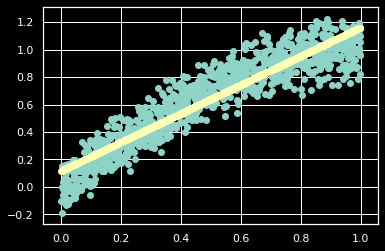

In [18]:
plt.scatter(X, Y)
plt.scatter(X, Y_pred)

In [19]:
y_model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0438344]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.11860753], dtype=float32)>]